In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_BM = pd.read_csv('../../datasets/Join Collection NSC2_BND_M20.csv')
df_BM ## 고혈압환자들만 select

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
0,0,3000,1921LE,200805.0,1,0,30,5.0,2002
1,1,6000,1921LE,200805.0,1,0,60,5.0,2002
2,2,3000,1921LE,200805.0,1,0,30,5.0,2002
3,3,4200,1921LE,200805.0,23,0,7,1.0,2007
4,4,1500,1921LE,201409.0,1,0,7,5.0,2004
...,...,...,...,...,...,...,...,...,...
4624,4624,3000,2005,NaN,1,0,30,1.0,2005
4625,4625,3000,2005,NaN,1,0,30,1.0,2005
4626,4626,3000,2005,NaN,1,0,30,1.0,2005
4627,4627,3000,2005,NaN,1,0,30,1.0,2006


In [3]:
df_BM.columns

Index(['Unnamed: 0', 'EDC_SBA', 'BTH_YYYY', 'DTH_YYYYMM', 'MCARE_SUBJ_CD',
       'OPRTN_YN', 'TOT_PRSC_DD_CNT', 'MCARE_RSLT_TYPE', 'STD_YYYY'],
      dtype='object')

In [4]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4629 non-null   int64  
 1   EDC_SBA          4629 non-null   int64  
 2   BTH_YYYY         4629 non-null   object 
 3   DTH_YYYYMM       373 non-null    float64
 4   MCARE_SUBJ_CD    4629 non-null   int64  
 5   OPRTN_YN         4629 non-null   int64  
 6   TOT_PRSC_DD_CNT  4629 non-null   int64  
 7   MCARE_RSLT_TYPE  4205 non-null   float64
 8   STD_YYYY         4629 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 325.6+ KB


#### 목표변수
    - EDC_SBA : 심결본인부담금

In [5]:
df_BM['EDC_SBA'].describe()

count      4629.000000
mean       4627.070642
std       17928.691046
min           0.000000
25%        1500.000000
50%        2900.000000
75%        3100.000000
max      574770.000000
Name: EDC_SBA, dtype: float64

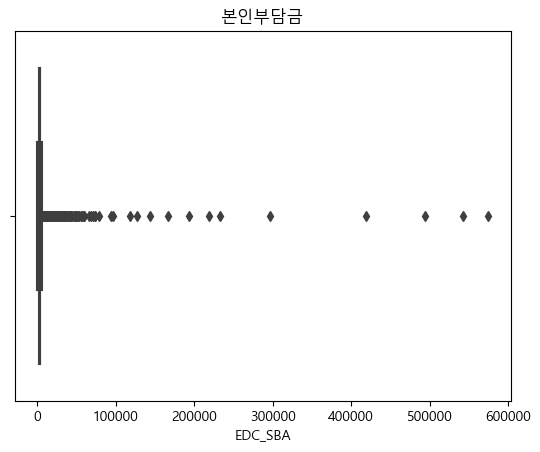

In [6]:
sns.boxplot(data=df_BM, x='EDC_SBA')
plt.title('본인부담금')
plt.show()

#### 설명변수
- 사망일 - 생년월일 or 2023 - 생년월일
    ⇒ 사망일의 null 값이 존재하여 2023년 기준으로 나이로 계산에서 진행 예정. 
- 총 처방일수
- 기준년도

In [7]:
# 생년
df_BM['BTH_YYYY'].describe()

count     4629
unique      64
top       1940
freq       240
Name: BTH_YYYY, dtype: object

<Axes: xlabel='BTH_YYYY', ylabel='Count'>

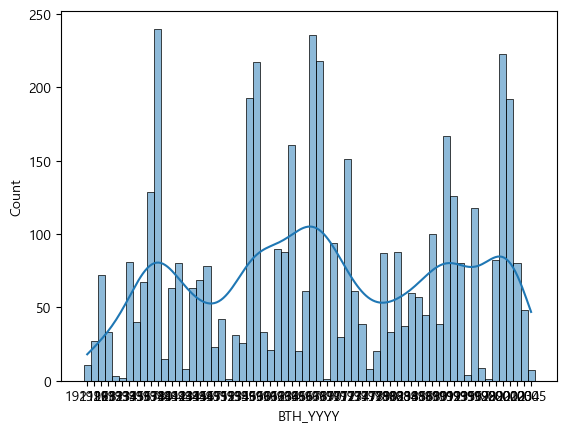

In [8]:
sns.histplot(data=df_BM, x='BTH_YYYY', kde=True)

In [9]:
condition = (df_BM['BTH_YYYY'] != '1921LE')
df_BMA = df_BM[condition]
df_BMA

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
11,11,8580,1926,201808.0,1,0,0,1.0,2006
12,12,2900,1926,201808.0,1,0,30,1.0,2008
13,13,2900,1926,201808.0,1,0,30,1.0,2008
14,14,2900,1926,201808.0,1,0,14,1.0,2008
15,15,3500,1926,201808.0,1,0,30,1.0,2008
...,...,...,...,...,...,...,...,...,...
4624,4624,3000,2005,NaN,1,0,30,1.0,2005
4625,4625,3000,2005,NaN,1,0,30,1.0,2005
4626,4626,3000,2005,NaN,1,0,30,1.0,2005
4627,4627,3000,2005,NaN,1,0,30,1.0,2006


In [10]:
df_BMA['BTH_Y']=pd.to_datetime(df_BMA['BTH_YYYY'].astype(str))

C:\Users\01-15\AppData\Local\Temp\ipykernel_6532\1629062973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['BTH_Y']=pd.to_datetime(df_BMA['BTH_YYYY'].astype(str))


In [11]:
def present(birth_year):
    current_year = pd.to_datetime('today').year  # 현재 연도 가져오기
    return current_year - birth_year.year 
## chatGPT에게 도움을 받음. 

In [12]:
df_BMA['Age']=df_BMA['BTH_Y'].apply(present) ## 2023년 기준 나이로 계산

C:\Users\01-15\AppData\Local\Temp\ipykernel_6532\1676463516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['Age']=df_BMA['BTH_Y'].apply(present) ## 2023년 기준 나이로 계산


<Axes: xlabel='Age', ylabel='Count'>

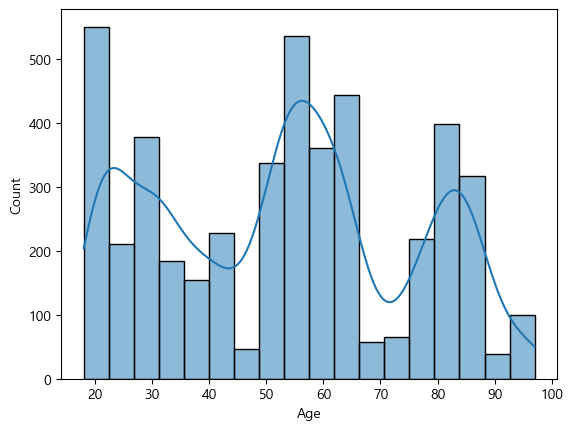

In [13]:
sns.histplot(data=df_BMA, x='Age', kde=True)

<Axes: xlabel='Age'>

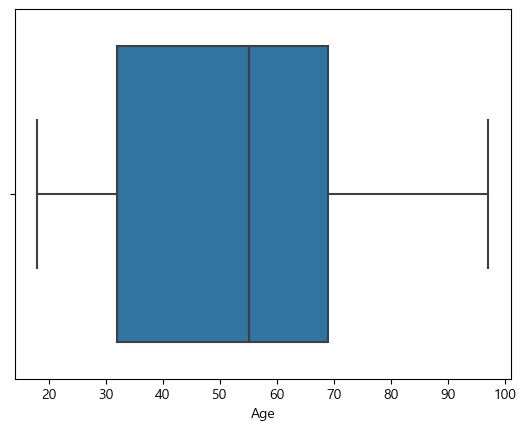

In [14]:
sns.boxplot(data=df_BMA, x='Age',)

In [15]:
df_BMA['DTH_YYYYMM'].isnull().sum()
# null 값이 대부분임. 

4256

<Axes: xlabel='DTH_YYYYMM', ylabel='Count'>

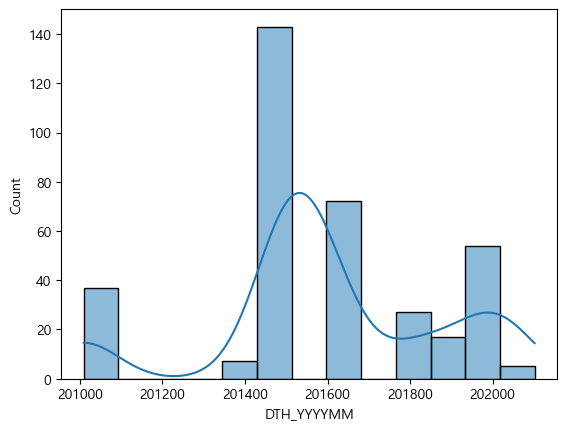

In [16]:
sns.histplot(data=df_BMA, x='DTH_YYYYMM', kde=True)

In [17]:
## 총 처방일 수 
df_BM['TOT_PRSC_DD_CNT'].describe()

count    4629.000000
mean       32.529272
std        19.974645
min         0.000000
25%        30.000000
50%        30.000000
75%        30.000000
max       190.000000
Name: TOT_PRSC_DD_CNT, dtype: float64

<Axes: xlabel='TOT_PRSC_DD_CNT', ylabel='Count'>

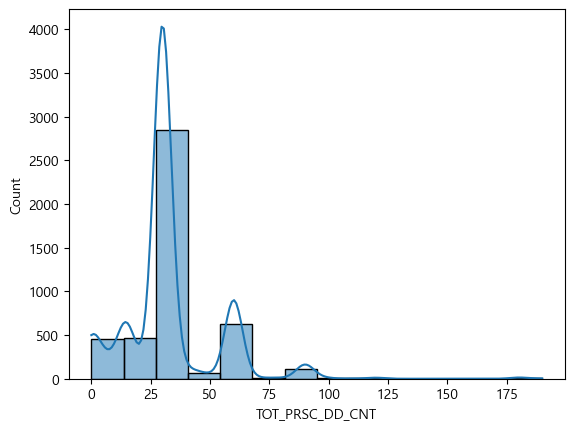

In [18]:
sns.histplot(data=df_BMA, x='TOT_PRSC_DD_CNT', kde=True)

<Axes: xlabel='TOT_PRSC_DD_CNT'>

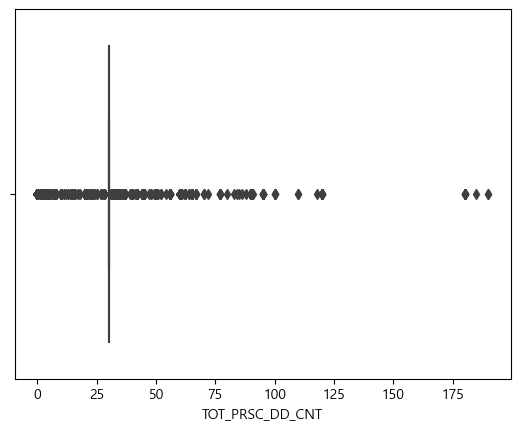

In [19]:
sns.boxplot(data=df_BMA, x='TOT_PRSC_DD_CNT',)

In [20]:
# 환자가 진료를 받은 연도
df_BMA['STD_YYYY'].describe()

count    4618.000000
mean     2006.933738
std         2.412593
min      2002.000000
25%      2005.000000
50%      2007.000000
75%      2009.000000
max      2011.000000
Name: STD_YYYY, dtype: float64

<Axes: xlabel='STD_YYYY', ylabel='Count'>

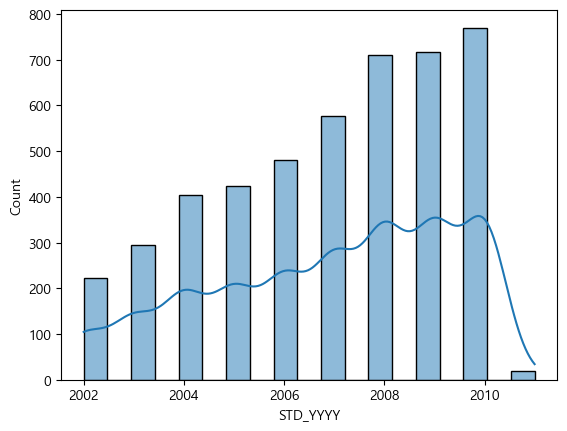

In [21]:
sns.histplot(data=df_BMA, x='STD_YYYY', kde=True)

In [22]:
## 현재 기준으로 진료 받은 년차
def disease(year) :
    result = 2023 - year
    return result

In [28]:
df_BMA['disease_year']= df_BMA['STD_YYYY'].apply(disease)

C:\Users\01-15\AppData\Local\Temp\ipykernel_6532\4100314602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['disease_year']= df_BMA['STD_YYYY'].apply(disease)


In [29]:
df_BMA

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY,BTH_Y,Age,D_year,disease_year
11,11,8580,1926,201808.0,1,0,0,1.0,2006,1926-01-01,97,17,17
12,12,2900,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15,15
13,13,2900,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15,15
14,14,2900,1926,201808.0,1,0,14,1.0,2008,1926-01-01,97,15,15
15,15,3500,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4624,4624,3000,2005,NaN,1,0,30,1.0,2005,2005-01-01,18,18,18
4625,4625,3000,2005,NaN,1,0,30,1.0,2005,2005-01-01,18,18,18
4626,4626,3000,2005,NaN,1,0,30,1.0,2005,2005-01-01,18,18,18
4627,4627,3000,2005,NaN,1,0,30,1.0,2006,2005-01-01,18,17,17


<Axes: xlabel='disease_year', ylabel='Count'>

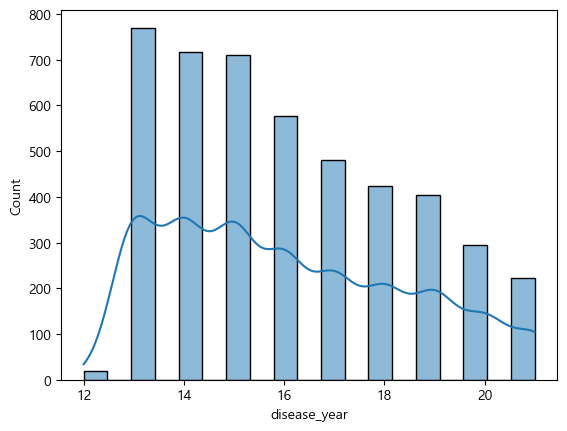

In [30]:
sns.histplot(data=df_BMA, x='disease_year', kde=True)

In [31]:
df_BMA['disease_year'].value_counts()

13    770
14    717
15    711
16    576
17    481
18    423
19    405
20    294
21    223
12     18
Name: disease_year, dtype: int64

<Axes: xlabel='disease_year'>

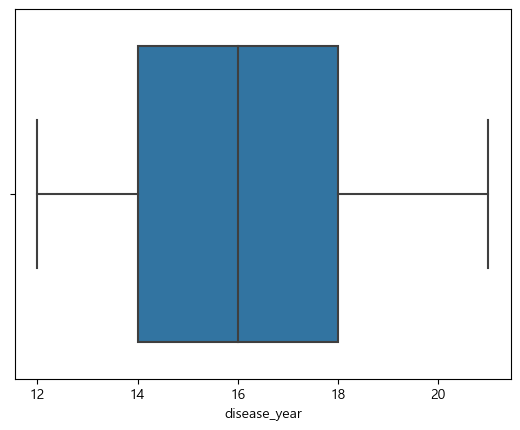

In [32]:
sns.boxplot(data=df_BMA, x='disease_year')

<Axes: xlabel='disease_year', ylabel='count'>

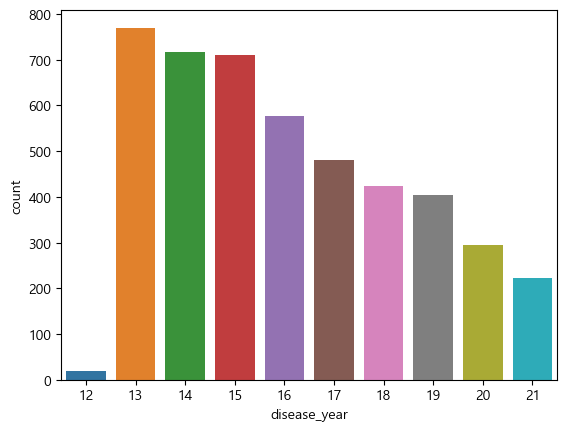

In [33]:
sns.countplot(data=df_BMA, x='disease_year')

#### DDA 변수 분석 결과
- 심결본인부담금: 연속형
- 생년월일-사망월일로 진행하려 했으나 데이터의 일관성이 없었고 DTH의 null값이 대부분이라 출생년도 1921부터 2023년 현재 생존한 환자로 확인 (현재연령- 연속형)
- 총 처방일수: 연속형 
- 첫 진료받은 년도: 범주형 가능할듯. 12~21년 (2023년 기준)